# Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database / Final Projects 3 / Ensemble


 Nama : Wilda Amrul Munafiah
 
 Program : Python for Data Science
 
 Kode Peserta : PYTN-KS16-021

# Objective

- Membuat pemodelan untuk memprediksi kematian pasien gagal jantung
- Membuat pemodelan untuk memprediksi kemungkinan selamat pasien gagal jantung

# A. Perkenalan

### Projects Overview
Data didapat melalui link berikut : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

### Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


# B. Import Library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

# C. Loading Data 
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana

In [2]:
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
df.astype('category').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


In [7]:
df

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

 ############################################################ 

anaemia : 
0    170
1    129
Name: anaemia, dtype: int64

 ############################################################ 

creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosp

In [8]:
df.shape

(299, 13)

# D. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ditemukan Missing Value pada Dataframe

In [10]:
df.duplicated().sum()

0

Tidak ditemukan juga Duplikasi data pada Dataframe

# E. Eksplorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [11]:
#Melihat rata rata umur dan jenis kelamin terhadap yang terkena penyakit kardiovaskular atau gagal jantung
mean = df.mean()
mean

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [12]:
# Melihat nilai terkecil dari masing-masing atribut Dataframe
min=df.min()
min

age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
time                            4.0
DEATH_EVENT                     0.0
dtype: float64

In [13]:
# Melihat nilai terbesar dari masing-masing atribut Dataframe
max=df.max()
max

age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
time                           285.0
DEATH_EVENT                      1.0
dtype: float64

In [14]:
# Melihat proporsi data pada kolom Usia dan Kematian dengan menggunakan crosstab
pd.crosstab(df.DEATH_EVENT, df.age)

age,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,79.0,80.0,81.0,82.0,85.0,86.0,87.0,90.0,94.0,95.0
DEATH_EVENT,,,,,,,,,,,,,,,,,,,,,
0,7,1,6,1,2,13,2,1,0,3,...,1,2,1,0,3,0,0,1,0,0
1,0,0,1,0,0,6,1,0,2,1,...,0,5,0,3,3,1,1,2,1,2


In [15]:
#Melihat nilai unik pada variabel target
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

Terlihat bahwa pada variabel target terdapat 2 nilai unik yaitu 1 dan 0, dimana:
- 1 merupakan jumlah orang yang memliki risiko kematian akibat gagal jantung 
- 0 merupakan jumlah orang yang tidak memiliki risiko kematian akibat gagal jantung.

In [16]:
#Mengelompokkan Data Kategorikal dan Data Numerikal
cat_fit = ['anaemia','diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
num_fit = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

C:\Users\ACER\AppData\Local\Temp\ipykernel_12904\631226564.py:11: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT']==0, col], label='alive', color = 'palevioletred', shade=True, kernel='gau', cut=0)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12904\631226564.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT']==0, col], label='alive', color = 'palevioletred', shade=True, kernel='gau', cut=0)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12904\631226564.py:12: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT']==1, col], label="dead",  color = 'crimson', sha

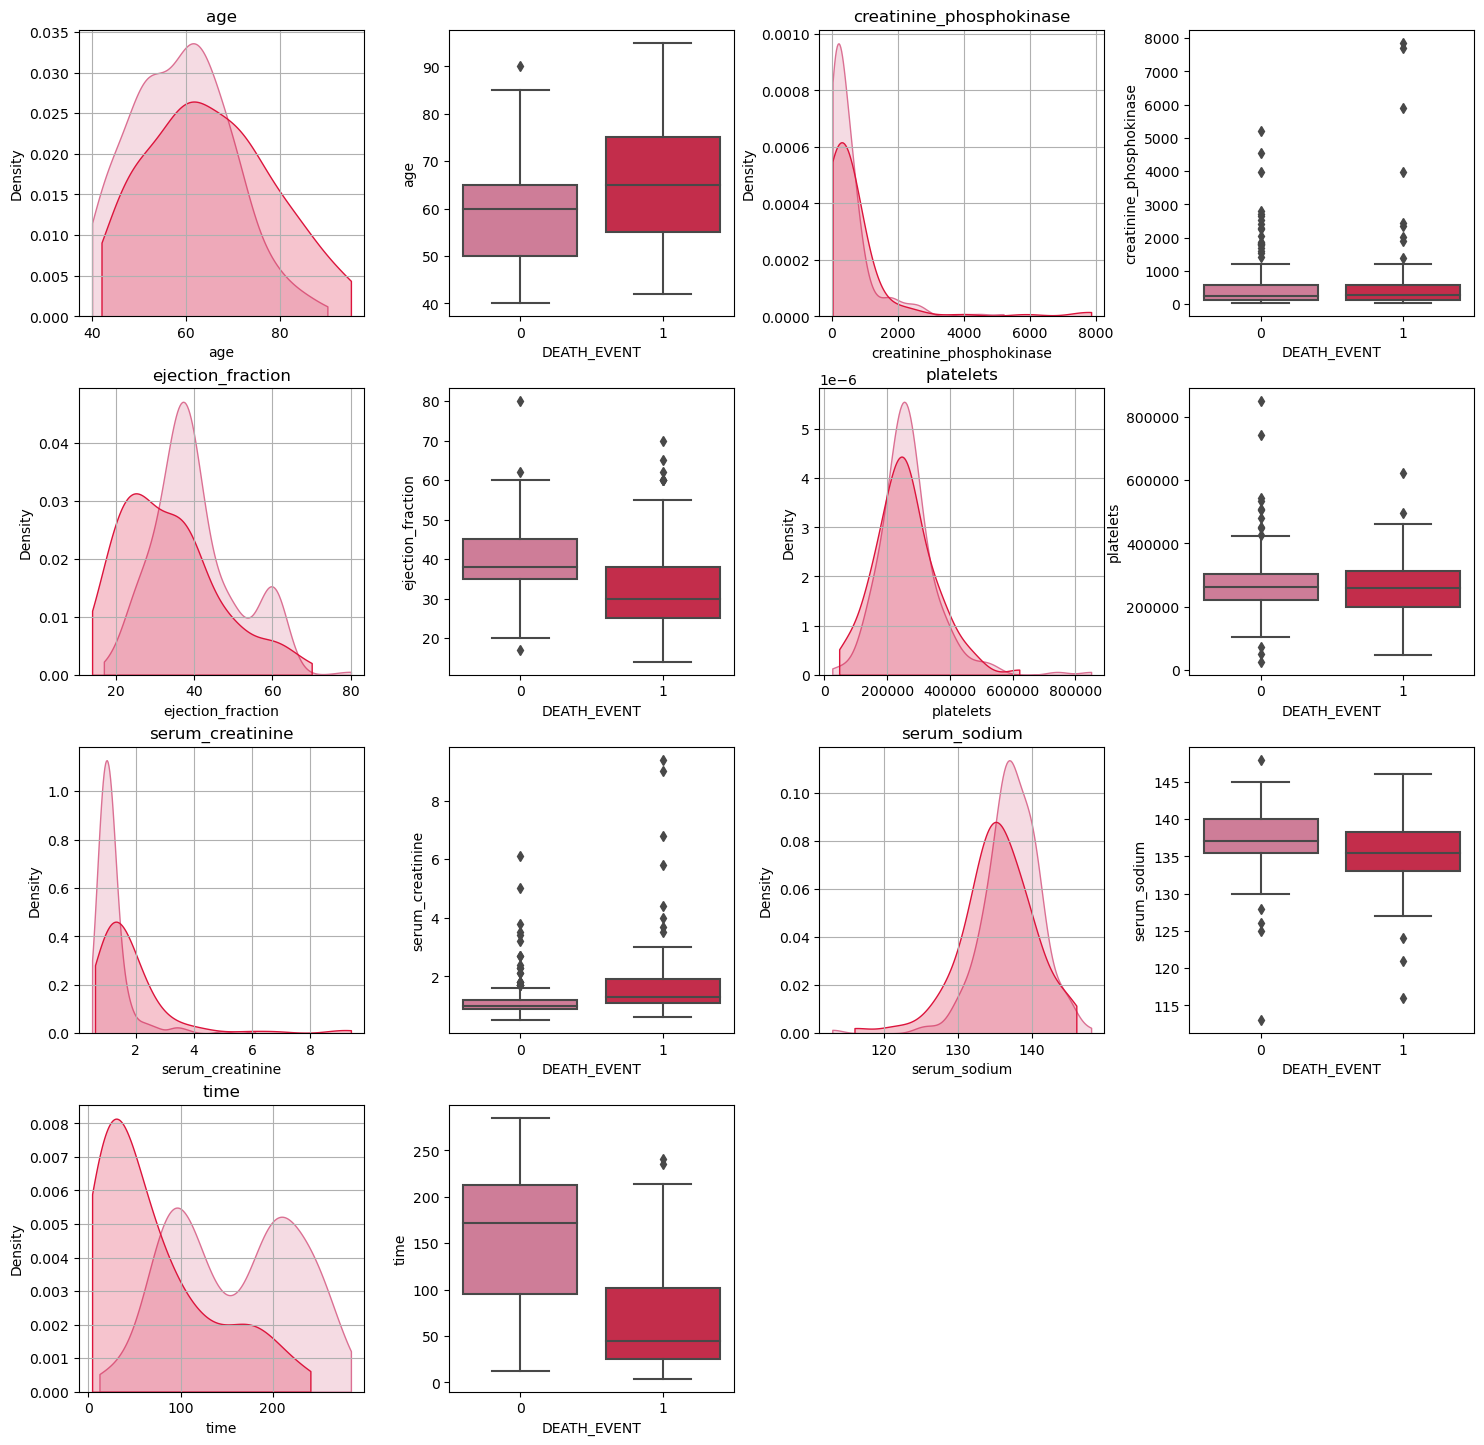

In [17]:
# Visualisasi numerical feature

plt.figure(figsize=(18, 27))

for i, col in enumerate(num_fit):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df['DEATH_EVENT']==0, col], label='alive', color = 'palevioletred', shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df['DEATH_EVENT']==1, col], label="dead",  color = 'crimson', shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x='DEATH_EVENT', palette = ['palevioletred', 'crimson'])  

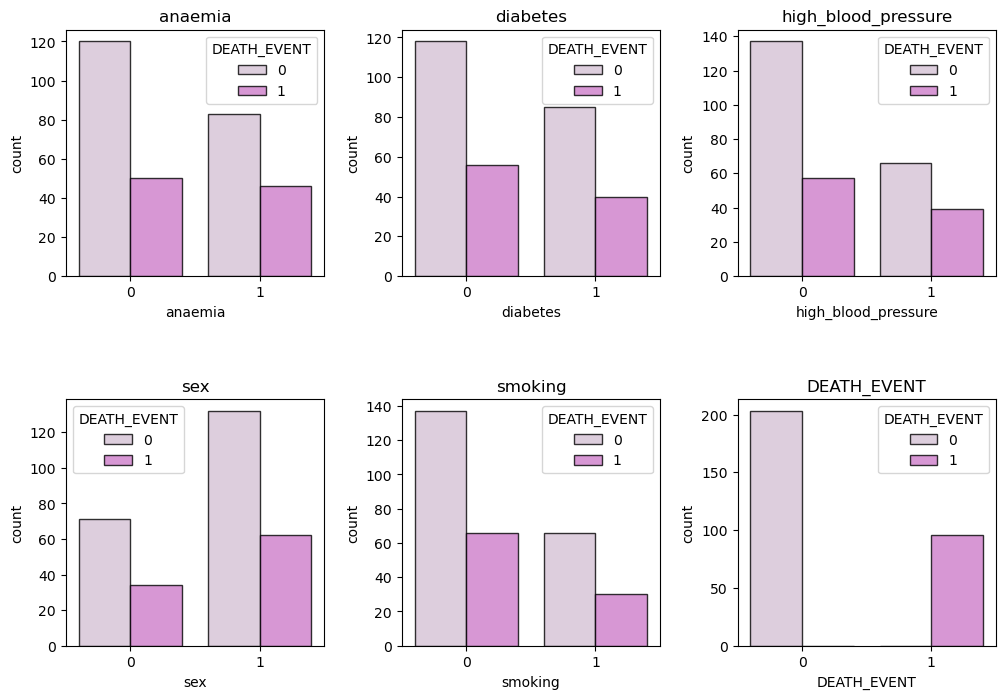

In [18]:
# Visualisasi categorical feature
plt.figure(figsize=(12, 8))

for i, col in enumerate(cat_fit):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=df,
                  x=col, 
                  hue='DEATH_EVENT',
                  palette = ['thistle','orchid'],
                  alpha=0.8, 
                  edgecolor='k', 
                  linewidth=1)


C:\Users\ACER\AppData\Local\Temp\ipykernel_12904\3671975908.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['age'], rug=True)


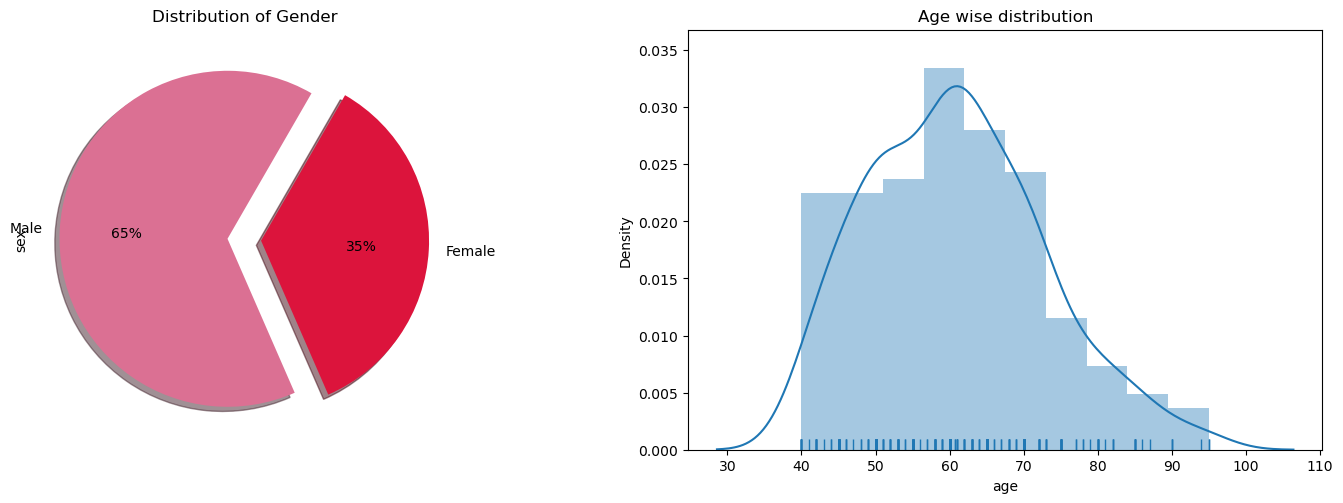

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie (autopct = '%1.0f%%',
                                  colors = ['palevioletred', 'crimson'],
                                  startangle = 60,
                                  labels=["Male","Female"],
                                  explode=[.1,.1],
                                  shadow =True
                                  )
plt.title('Distribution of Gender')
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

Perbandingan antara pria dan wanita yang meninggal karena gagal jantung adalah 65% : 35%. Dimana pasien pria jauh lebih banyak dibanding pasien wanita. Kemudian untuk usia terbanyak pasien yang meninggal karena gagal jantung berada pada angka 60 tahun

## Analisis Diabetes terhadap Resiko Kematian akibat Gagal Jantung

In [20]:
Diabetes = df['diabetes'].value_counts(normalize=True)*100
Diabetes

0    58.19398
1    41.80602
Name: diabetes, dtype: float64

Keterangan :

    0 = Tidak mengidap diabetes
    1 = Mengidap diabetes

In [21]:
df1 = df[(df['diabetes'] == 0) & (df['DEATH_EVENT'] == 1)]
df2 = df[(df['diabetes'] == 1) & (df['DEATH_EVENT'] == 1)]

diabetes_death = pd.concat([df1, df2])

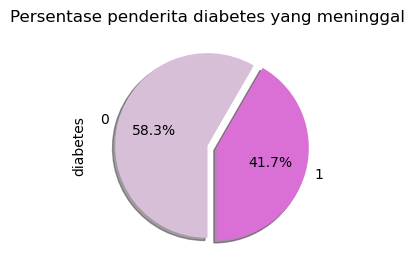

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))

diabetes_death['diabetes'].value_counts().plot.pie(autopct="%1.1f%%",
                                                   colors = ['thistle','orchid'],
                                                   startangle = 60,
                                                   ax=ax, 
                                                   shadow=True, 
                                                   explode=[0, 0.1])
ax.set_title('Persentase penderita diabetes yang meninggal')
plt.show()

Keterangan :

    0 = tidak mengidap diabetes, 
    1 = mengidap diabetes
    
Interpretasi:
- Terdapat 58,3% pasien yang tidak mengidap penyakit diabetes meninggal
- Terdapat 41,7% pasien yang mengidap penyakit diabetes meninggal

Pasien dengan riwayat diabetes memiliki resiko kematian yang lebih rendah dibanding pasien tanpa riwayat diabetes. Sehingga diabetes tidak berpengaruh terhadap resiko kematian gagal jantung

## Analisis Anemia terhadap Resiko Kematian akibat Gagal Jantung

In [23]:
Anemia = df['anaemia'].value_counts(normalize=True)*100
Anemia

0    56.856187
1    43.143813
Name: anaemia, dtype: float64

In [24]:
df3 = df[(df['anaemia'] == 0) & (df['DEATH_EVENT'] == 1)]
df4 = df[(df['anaemia'] == 1) & (df['DEATH_EVENT'] == 1)]

anemia_death = pd.concat([df3, df4])

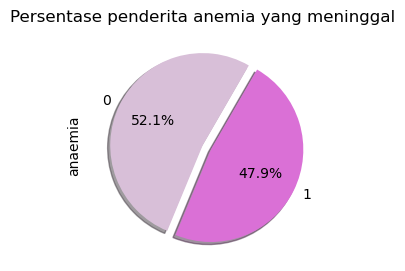

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))

anemia_death['anaemia'].value_counts().plot.pie(autopct="%1.1f%%",
                                                   colors = ['thistle','orchid'],
                                                   startangle = 60,
                                                   ax=ax, 
                                                   shadow=True, 
                                                   explode=[0, 0.1])
ax.set_title('Persentase penderita anemia yang meninggal')
plt.show()

Keterangan :

    0 = tidak mengidap anemia, 
    1 = mengidap anemia
    
Interpretasi:
- Terdapat 52,1% pasien yang tidak mengidap anemia meninggal
- Terdapat 47,9% pasien yang mengidap anemia meninggal

Pasien dengan riwayat anemia memiliki resiko kematian yang lebih rendah dibanding pasien tanpa riwayat anemia. Sehingga anemia tidak berpengaruh terhadap resiko kematian gagal jantung

## Analisis Perokok terhadap Resiko Kematian akibat Gagal Jantung

In [26]:
Rokok = df['smoking'].value_counts(normalize=True)*100
Rokok

0    67.892977
1    32.107023
Name: smoking, dtype: float64

In [27]:
df5 = df[(df['smoking'] == 0) & (df['DEATH_EVENT'] == 1)]
df6 = df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)]

smoking_death = pd.concat([df5, df6])

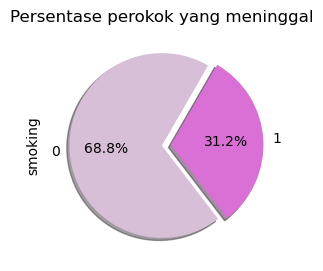

In [28]:
fig, ax = plt.subplots(figsize=(15, 3))

anemia_death['smoking'].value_counts().plot.pie(autopct="%1.1f%%",
                                                   colors = ['thistle','orchid'],
                                                   startangle = 60,
                                                   ax=ax, 
                                                   shadow=True, 
                                                   explode=[0, 0.1])
ax.set_title('Persentase perokok yang meninggal')
plt.show()

Keterangan :

    0 = tidak merokok, 
    1 = merokok
    
Interpretasi:
- Terdapat 68,8% pasien yang tidak merokok meninggal
- Terdapat 31,2% pasien yang merokok meninggal

Pasien dengan riwayat perokok aktif memiliki resiko kematian yang lebih rendah dibanding pasien bukan perokok. Sehingga merokok tidak berpengaruh terhadap resiko kematian gagal jantung

## Analisis Penderita Darah Tinggi terhadap Resiko Kematian akibat Gagal Jantung

In [29]:
DarahTinggi = df['high_blood_pressure'].value_counts(normalize=True)*100
DarahTinggi

0    64.882943
1    35.117057
Name: high_blood_pressure, dtype: float64

In [30]:
df7 = df[(df['high_blood_pressure'] == 0) & (df['DEATH_EVENT'] == 1)]
df8 = df[(df['high_blood_pressure'] == 1) & (df['DEATH_EVENT'] == 1)]

DarahTinggi_death = pd.concat([df7, df8])

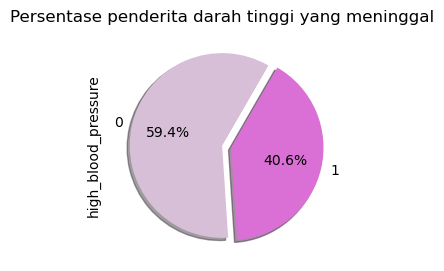

In [31]:
 fig, ax = plt.subplots(figsize=(15, 3))

anemia_death['high_blood_pressure'].value_counts().plot.pie(autopct="%1.1f%%",
                                                   colors = ['thistle','orchid'],
                                                   startangle = 60,
                                                   ax=ax, 
                                                   shadow=True, 
                                                   explode=[0, 0.1])
ax.set_title('Persentase penderita darah tinggi yang meninggal')
plt.show()

Keterangan :

    0 = tidak memiliki tekanan darah tinggi, 
    1 = memiliki tekanan darah tinggi
    
Interpretasi:
- Terdapat 59,4% pasien yang tidak menderita darah tinggi
- Terdapat 40,6% pasien yang menderita darah tinggi

Pasien dengan riwayat darah tinggi memiliki resiko kematian yang lebih rendah dibanding pasien tanpa riwayat darah tinggi. Sehingga Tekanan darah tinggi tidak berpengaruh terhadap resiko kematian gagal jantung

#### INSIGHT
Berdasarkan analisis diatas, dapat ditarik kesimpulan bahwa diabetes, anemia, merokok, dan tekanan darah tinggi tidak berpengaruh secara signifikan terhadap resiko kematian gagal jantung. 


### Melihat korelasi antar variabel pada kolom di dataframe

In [32]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


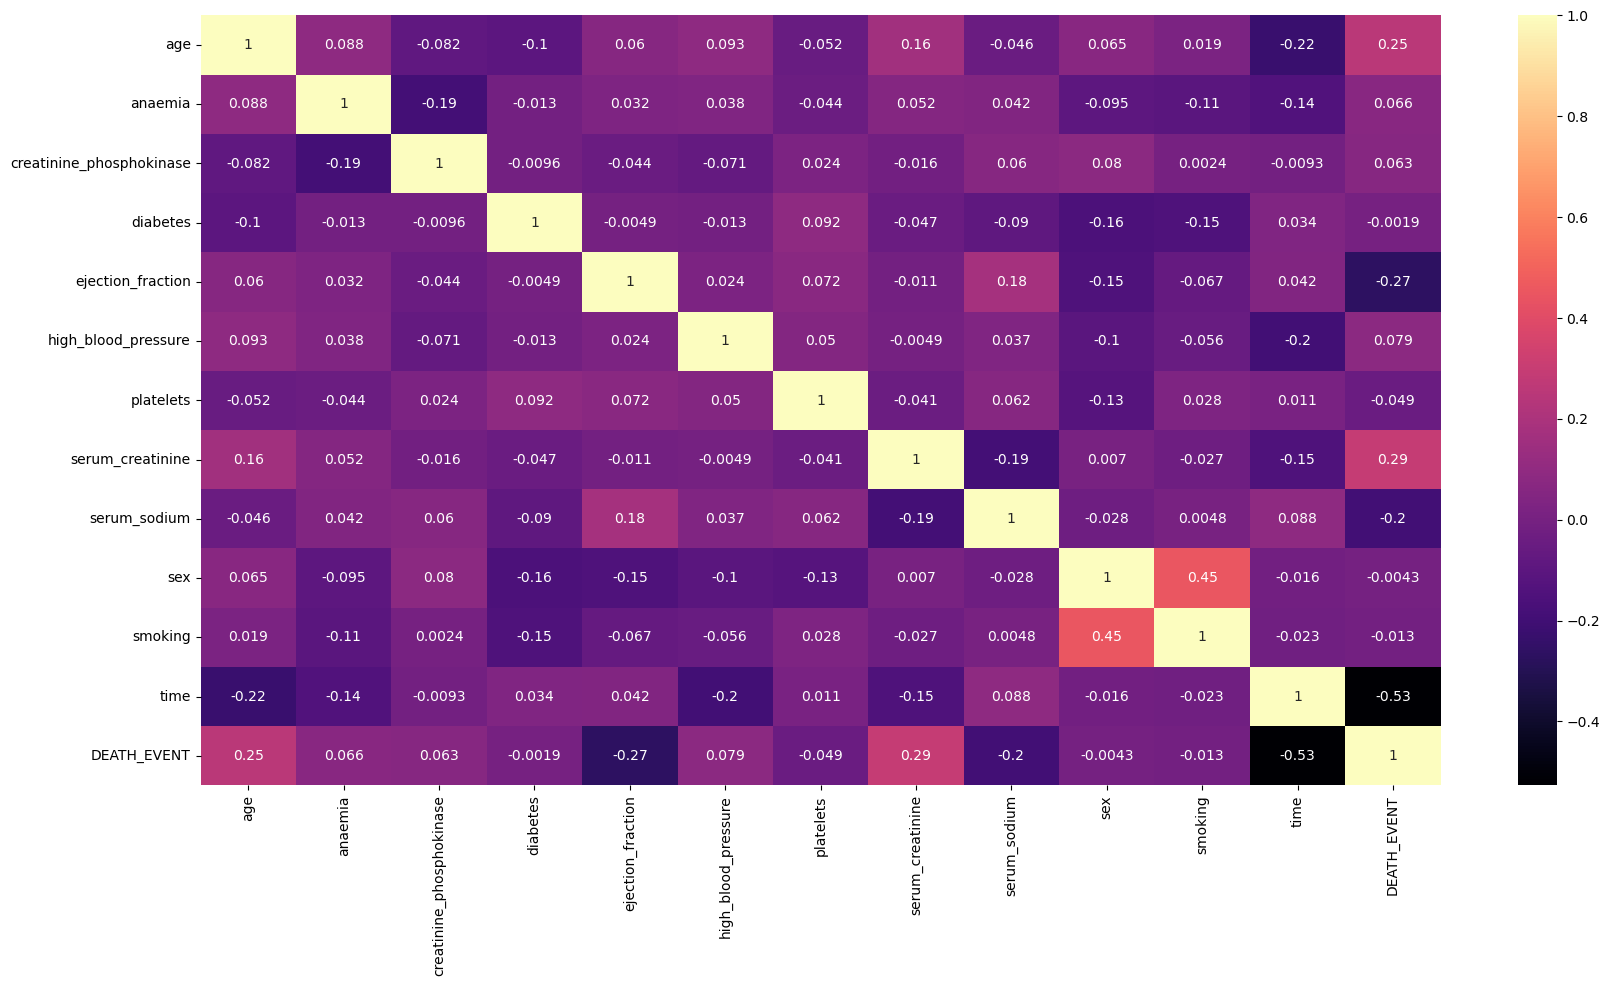

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.show()

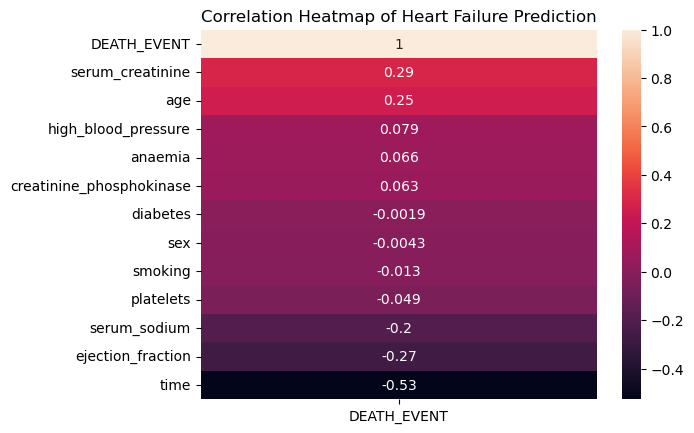

In [34]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

#### INSIGHT
Berdasarkan plot di atas, terlihat bahwa variabel DEATH_EVENT memiliki korelasi yang cukup tinggi dengan variabel serum_creatinine. Kemudian untuk variabel DEATH_EVENT dengan variabel time sangatlah rendah. 

Sedangkan untuk variabel lainnya memiliki korelasi yang relatif rendah juga terhadap variabel DEATH_EVENT



# F. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

#### 1. Inisialisasi variabel x dan Y

In [35]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

print(X.shape)
print(y.shape)

(299, 12)
(299,)


#### 2. Feature selection menggunakan library Sequential feature selectior dengan Metode regresi Linier

In [36]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

#### 3. Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


# G. Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

In [38]:
# Logistic Regression
lr = LogisticRegression()

In [39]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()

In [40]:
# Support Vector Machine (SVM)
svm = SVC()

In [41]:
# Decision Tree
df = DecisionTreeClassifier()

In [42]:
# Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=0)

In [43]:
# Naive Bayes
nb = GaussianNB()

In [44]:
# RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=0)

In [45]:
# Extra tree Classifier
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=3, random_state=1)

In [46]:
# Gradient Boosting Classifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

# H. Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.


In [47]:
RFC= clf1.fit(X_train, y_train)

In [48]:
ETC= clf2.fit(X_train, y_train)

In [49]:
GBC= clf3.fit(X_train, y_train)

# I.  Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin
dibawah. Jika tidak, lanjut ke poin 5 dan 6.


#### 1. Model Random Forest Classifier

In [50]:
RFC.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.3, 0.7],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.7, 0.3],
       [1. , 0. ],
       [1. ,

In [51]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [52]:
print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC
      .score(X_train, y_train))

Test score: 0.8333333333333334
Train score: 1.0


In [53]:
confusion_matrix(y_test, y_pred_RFC)

array([[37,  5],
       [ 5, 13]], dtype=int64)

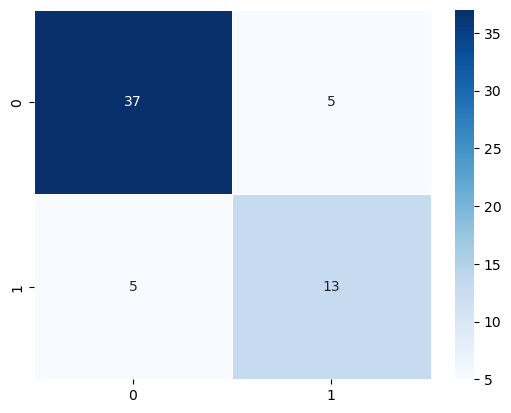

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.72      0.72      0.72        18

    accuracy                           0.83        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.83      0.83      0.83        60



In [54]:
cm = confusion_matrix(y_test, y_pred_RFC)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.show()
print(classification_report(y_test, y_pred_RFC))

In [55]:
# Ringkasan Hasil Evaluasi
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_RFC))
print('Presisi :', precision_score(y_test,y_pred_RFC))
print('F1 Score :', f1_score(y_test,y_pred_RFC))

Ringkasan Evaluasi Model
Akurasi : 0.8333333333333334
Presisi : 0.7222222222222222
F1 Score : 0.7222222222222222


#### 2. Model Extra Tree Classifier

In [56]:
#memeriksa performa model
ETC.predict_proba(X_test)

array([[0.84931288, 0.15068712],
       [0.73533856, 0.26466144],
       [0.83954603, 0.16045397],
       [0.54683334, 0.45316666],
       [0.18617041, 0.81382959],
       [0.46354972, 0.53645028],
       [0.57300013, 0.42699987],
       [0.64054696, 0.35945304],
       [0.54594025, 0.45405975],
       [0.90465937, 0.09534063],
       [0.71639975, 0.28360025],
       [0.77179192, 0.22820808],
       [0.57294003, 0.42705997],
       [0.54429526, 0.45570474],
       [0.55641991, 0.44358009],
       [0.82377048, 0.17622952],
       [0.88747944, 0.11252056],
       [0.92368421, 0.07631579],
       [0.80959627, 0.19040373],
       [0.7801794 , 0.2198206 ],
       [0.59716451, 0.40283549],
       [0.87023703, 0.12976297],
       [0.76705148, 0.23294852],
       [0.25142857, 0.74857143],
       [0.89705927, 0.10294073],
       [0.68366539, 0.31633461],
       [0.89699576, 0.10300424],
       [0.55099277, 0.44900723],
       [0.83544257, 0.16455743],
       [0.75146935, 0.24853065],
       [0.

In [57]:
# melihat hasil prediksi
y_pred_ETC = ETC.predict(X_test)
y_pred_ETC


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [58]:
# Melihat nilai akurasi
print("Test score:", ETC.score(X_test, y_test))
print("Train score:", ETC.score(X_train, y_train))

Test score: 0.7666666666666667
Train score: 0.8702928870292888


In [59]:
# melihat confussion matrix 
confusion_matrix(y_test, y_pred_ETC)

array([[42,  0],
       [14,  4]], dtype=int64)

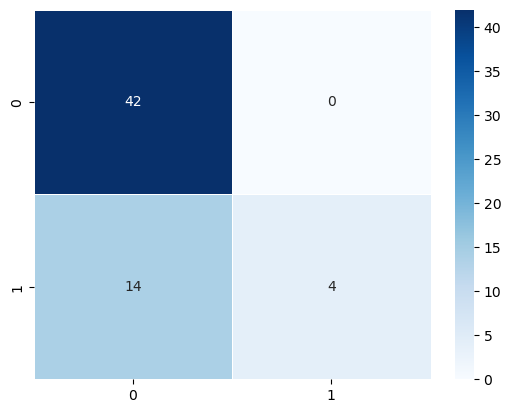

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        42
           1       1.00      0.22      0.36        18

    accuracy                           0.77        60
   macro avg       0.88      0.61      0.61        60
weighted avg       0.82      0.77      0.71        60



In [60]:
cm = confusion_matrix(y_test, y_pred_ETC)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.show()
print(classification_report(y_test, y_pred_ETC))

In [61]:
# Ringkasan Hasil Evaluasi
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_ETC))
print('Presisi :', precision_score(y_test,y_pred_ETC))
print('F1 Score :', f1_score(y_test,y_pred_ETC))
     

Ringkasan Evaluasi Model
Akurasi : 0.7666666666666667
Presisi : 1.0
F1 Score : 0.3636363636363636


#### 3. Gradient Boosting Classifier

In [62]:
# memeriksa performa model
GBC.predict_proba(X_test)

array([[0.95650853, 0.04349147],
       [0.91261759, 0.08738241],
       [0.92669397, 0.07330603],
       [0.80314996, 0.19685004],
       [0.04124996, 0.95875004],
       [0.58372266, 0.41627734],
       [0.11564186, 0.88435814],
       [0.31001974, 0.68998026],
       [0.20450971, 0.79549029],
       [0.95650853, 0.04349147],
       [0.87633533, 0.12366467],
       [0.68205991, 0.31794009],
       [0.54523143, 0.45476857],
       [0.34752218, 0.65247782],
       [0.37347373, 0.62652627],
       [0.93398548, 0.06601452],
       [0.91554923, 0.08445077],
       [0.93625758, 0.06374242],
       [0.93454659, 0.06545341],
       [0.88517113, 0.11482887],
       [0.89476276, 0.10523724],
       [0.97665087, 0.02334913],
       [0.89476276, 0.10523724],
       [0.01044623, 0.98955377],
       [0.95650853, 0.04349147],
       [0.84864988, 0.15135012],
       [0.94793224, 0.05206776],
       [0.53133431, 0.46866569],
       [0.91260788, 0.08739212],
       [0.92269223, 0.07730777],
       [0.

In [63]:
# memeriksa nilai prediksi model
y_pred_GBC =GBC.predict(X_test)
y_pred_GBC

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [64]:
# Memeriksa Akurasi Model
print('Test score :', GBC.score(X_test, y_test))
print('Train score :', GBC.score(X_train, y_train))

Test score : 0.8666666666666667
Train score : 0.8828451882845189


In [65]:
#Confussion Matrix
confusion_matrix(y_test,y_pred_GBC)

array([[40,  2],
       [ 6, 12]], dtype=int64)

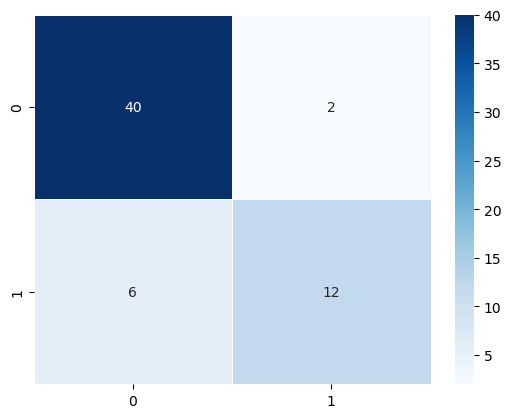

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.86      0.67      0.75        18

    accuracy                           0.87        60
   macro avg       0.86      0.81      0.83        60
weighted avg       0.87      0.87      0.86        60



In [66]:
cm = confusion_matrix(y_test, y_pred_GBC)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.show()
print(classification_report(y_test, y_pred_GBC))

In [67]:
# Ringkasan Hasil Evaluasi
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_GBC))
print('Presisi :', precision_score(y_test,y_pred_GBC))
print('F1 Score :', f1_score(y_test,y_pred_GBC))
     

Ringkasan Evaluasi Model
Akurasi : 0.8666666666666667
Presisi : 0.8571428571428571
F1 Score : 0.75


### Skor akurasi untuk setiap model

In [68]:
print("Akurasi Model Random Forest:", round(accuracy_score(y_test, y_pred_RFC), 4) * 100)
print("Akurasi Model Extra-trees Classifier:", round(accuracy_score(y_test, y_pred_ETC), 4) * 100)
print("Akurasi Model Gradient Boosting Classifier:", round(accuracy_score(y_test, y_pred_GBC), 4) * 100)


Akurasi Model Random Forest: 83.33
Akurasi Model Extra-trees Classifier: 76.67
Akurasi Model Gradient Boosting Classifier: 86.67


Berdasarkan beberapa pemodelan yang dilakukan di atas, kita mendapatkan 3 akurasi model sebagai berikut:

- Model Random Forest Classifier (0.8333333333333334)
- Model Extra Tree Classifier (0.7666666666666667)
- Model Gradient Boosting Classifier (0.8666666666666667)

Diperoleh Model Gradient Boosting Classifier dengan nilai akurasi terbaik yaitu dengan nilai sebesar 86% 

# J. Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet

In [69]:
Model_in=GradientBoostingClassifier()
Model_in.fit(X_train, y_train)
Model_in.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [70]:
display(df)

DecisionTreeClassifier()

Kasus 1 :
    Data pemeriksaan pasien adalah sebagai berikut:
    
        1. Umur : 55 Tahun
        2. Memiliki Anemia
        3. Creatine Phosphokinase: 140 mcg/L
        4. Tidak Memiliki Diabetes
        5. Ejection Fraction: 20 %
        6. Tidak Memiliki Tekanan Darah Tinggi
        7. Platelets: 143500 kiloplatelets/mL
        8. Serum Creatinine: 1.7 mg/dL
        9. Serum Sodium: 130 mEq/L
        10. Perempuan
        11. Tidak Merokok
        12. Time : 14 Hari 

Apakah Pasien memiliki risiko kematian akibat penyakit jantung

In [ ]:
age = int(input('Age:'))
anemia = int(input('Anemia (Type 0 for No, 1 for Yes):'))
cp = float(input('Creatinine Phosphokinase Enzime Level:'))
diabet = int(input('Diabet (Type 0 for No, 1 for Yes):'))
ef = float(input('Ejection Fraction Percentage:'))
hbp = int(input('High Blood Pressure (Type 0 for No, 1 for Yes):'))
plate = float(input('Platelets Level:'))
sc = float(input('Creatinine Serum Level:'))
ss = float(input('Sodium Level:'))
sex = int(input('Sex (Type 0 for Female, 1 for Male):'))
smoke = int(input('Smoke (Type 0 for No, 1 for Yes):'))
time = int(input('Follow up control: '))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
print('Input values:', val)

val_predict = model_rf.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

In [ ]:
scaler.fit(val)
val=scaler.transform([val])

# K. Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan.

- rata - rata usia pasien yang mengalami Penyakit kardiovaskular (CVDs) atau gagal jantung di usia 60 tahun
- usia pasien yang paling rendah yang mengalami penyakit kardivoskular atau gagal jantung ialah di usia 40 tahun
- usia pasien yang paling tinggi yang mengalami penyakit kardivoskular atau gagal jantung ialah di usia 95 tahun
- kita asumsikan bahwa nilai 0 ialah wanita, dan nilai 1 itu pria, jadi rata rata yang paling terdampak pada penyakit kardiovasular berdasarkan informasi dari dataset ialah seorang pasien wanita
- Jumlah pasien penderita gagal jantng didominasi oleh wanita. Dimana terdapat sebanyak 65% pasien adalah wanita
- Bahwa riwayat diabetes, anemia, merokok, dan tekanan darah tinggi tidak berpengaruh secara signifikan terhadap resiko kematian gagal jantung.
- Namun, untuk kolom time atau waktu follow-up pasien menunjukkan bahwa semakin sedikit waktu follow-up, maka risiko kematian akibat penyakit jantung semakin tinggi dikarenakan kurangnya kontrol kondisi kesehatan atau kondisi vital pasien.